In [1]:
import or_gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from copy import deepcopy
plt.style.use('cmu_paper')

In [2]:
def load_model_results(model='RL', base_path='../scenarios', version=2):
    data_dict = {}
    data_dirs = os.listdir(base_path)
    for d in data_dirs:
        # Load RL data
        if model in d and str(version) in d:
            file_count = 0
            _path = os.path.join(base_path, d)
            files = os.listdir(_path)
            for f in files:
                if 'pkl' not in f.split('.')[-1]:
                    continue
                path = os.path.join(_path, f)
                data = pickle.load(open(path, 'rb'))
                data_dict[file_count] = deepcopy(data)
                file_count += 1
                
    return data_dict

In [27]:
rl_v2 = load_model_results()
rl_v3 = load_model_results(version=3)
rh_v2 = load_model_results('RH')
rh_v3 = load_model_results('RH', version=3)
sh_v2 = load_model_results('SH')
sh_v3 = load_model_results('SH', version=3)
or_v2 = load_model_results('Oracle')
or_v3 = load_model_results('Oracle', version=3)

# RL Rewards were saved differently
rl_v2_ = pickle.load(open('../scenarios/data/rl_v2.pkl', 'rb'))
rl_v3_ = pickle.load(open('../scenarios/data/rl_v3.pkl', 'rb'))
rl_v2_reward = rl_v2_['rewards'].sum(axis=1)
rl_v3_reward = rl_v3_['rewards'].sum(axis=1)

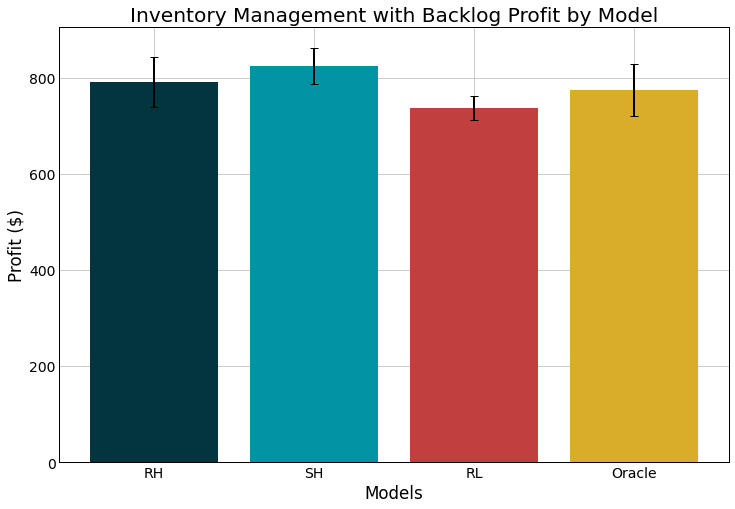

In [28]:
# Plot reward averages and std
sh_v2_reward = np.array([i.P.values.sum() for i in sh_v2.values()])
rh_v2_reward = np.array([i.P.values.sum() for i in rh_v2.values()])
oracle_v2_reward = np.array([i.P.values.sum() for i in or_v2.values()])

plt.figure(figsize=(12,8))
plt.bar(0, rh_v2_reward.mean(), yerr=rh_v2_reward.std(), capsize=4)
plt.bar(1, sh_v2_reward.mean(), yerr=sh_v2_reward.std(), capsize=4)
plt.bar(2, rl_v2_reward.mean(), yerr=rl_v2_reward.std(), capsize=4)
plt.bar(3, oracle_v2_reward.mean(), yerr=oracle_v2_reward.std(), capsize=4)

plt.xticks(np.arange(4), ['RH', 'SH', 'RL', 'Oracle'])

plt.xlabel('Models')
plt.ylabel('Profit ($)')
plt.title('Inventory Management with Backlog Profit by Model')

plt.show()

In [29]:
def build_data_table(RH, SH, RL, Oracle):
    df = pd.DataFrame({'Rolling Horizon':
                           {'A': RH.mean(),
                            'B': RH.std()},
                        'Shrinking Horizon':
                           {'A': SH.mean(),
                            'B': SH.std()},
                        'RL':
                           {'A': RL.mean(),
                            'B': RL.std()},
                        'Oracle':
                           {'A': Oracle.mean(),
                            'B': Oracle.std()}})

    df = df.apply(lambda x: np.round(x, 1))
    df['Metric'] = ['Mean Rewards', 'Std Rewards']
    df = df.set_index(df['Metric']).drop('Metric', axis=1)
    return df

In [30]:
df2 = build_data_table(rh_v2_reward, sh_v2_reward, rl_v2_reward, oracle_v2_reward)
df2

,Rolling Horizon,Shrinking Horizon,RL,Oracle
Metric,,,,
Mean Rewards,791.6,825.3,737.2,774.3
Std Rewards,52.3,36.8,24.8,54.0


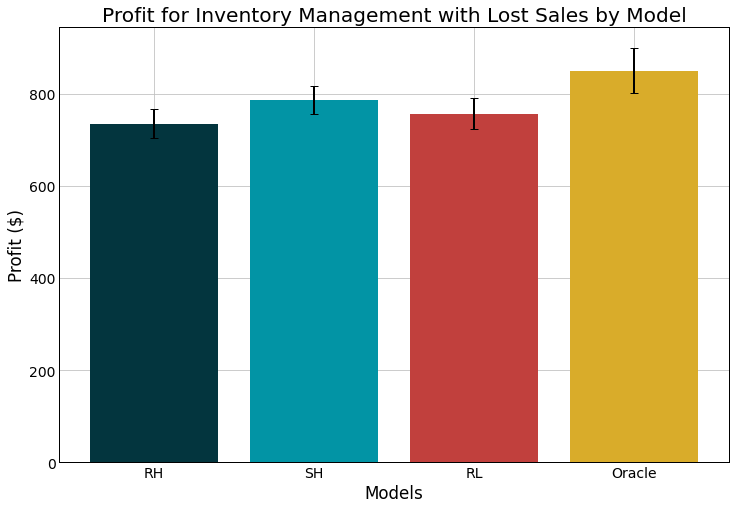

In [31]:
# Plot reward averages and std
sh_v3_reward = np.array([i.P.values.sum() for i in sh_v3.values()])
rh_v3_reward = np.array([i.P.values.sum() for i in rh_v3.values()])
oracle_v3_reward = np.array([i.P.values.sum() for i in or_v3.values()])
# rl_v3_reward = np.array([i.P.values.sum() for i in rl_v3.values()])

plt.figure(figsize=(12,8))
plt.bar(0, rh_v3_reward.mean(), yerr=rh_v3_reward.std(), capsize=4)
plt.bar(1, sh_v3_reward.mean(), yerr=sh_v3_reward.std(), capsize=4)
plt.bar(2, rl_v3_reward.mean(), yerr=rl_v3_reward.std(), capsize=4)
plt.bar(3, oracle_v3_reward.mean(), yerr=oracle_v3_reward.std(), capsize=4)

plt.xticks(np.arange(4), ['RH', 'SH', 'RL', 'Oracle'])

plt.xlabel('Models')
plt.ylabel('Profit ($)')
plt.title('Profit for Inventory Management with Lost Sales by Model')

plt.show()

In [32]:
df3 = build_data_table(rh_v3_reward, sh_v3_reward, rl_v3_reward, oracle_v3_reward)
df3

,Rolling Horizon,Shrinking Horizon,RL,Oracle
Metric,,,,
Mean Rewards,735.8,786.9,757.8,850.8
Std Rewards,31.1,30.6,33.1,49.1


In [33]:
def oracle_check(RH, SH, RL, Oracle):
    '''
    The Oracle model ought to outperform all other models for
    each and every test scenario.
    '''
    vRH = len(np.where(Oracle>RH)[0])
    vSH = len(np.where(Oracle>SH)[0])
    vRL = len(np.where(Oracle>RL)[0])
    rhp = vRH/len(Oracle) * 100
    shp = vSH/len(Oracle) * 100
    rlp = vRL/len(Oracle) * 100
    print("Oracle outperforms in RH {:.2f}% of cases.".format(rhp))
    print("Oracle outperforms in SH {:.2f}% of cases.".format(shp))
    print("Oracle outperforms in RL {:.2f}% of cases.".format(rlp))

In [34]:
oracle_check(rh_v2_reward, sh_v2_reward, rl_v2_reward, oracle_v2_reward)

Oracle outperforms in RH 27.00% of cases.
Oracle outperforms in SH 7.00% of cases.
Oracle outperforms in RL 74.00% of cases.


In [35]:
oracle_check(rh_v3_reward, sh_v3_reward, rl_v3_reward, oracle_v3_reward)

Oracle outperforms in RH 100.00% of cases.
Oracle outperforms in SH 100.00% of cases.
Oracle outperforms in RL 94.00% of cases.


In [ ]:
# Compare